In [18]:
!pip install scikit-posthocs

In [19]:
import numpy as np
import numpy as np
from scipy.stats import friedmanchisquare
import seaborn as sns
import matplotlib.pyplot as plt
import scikit_posthocs as sp
import pandas as pd

In [20]:
times_to_rank_best = np.array([
    [0,	5,	12,	33],
    [3,	3,	15,	29],
    [4,	7,	5,	34],
])

print(times_to_rank_best)

[[ 0  5 12 33]
 [ 3  3 15 29]
 [ 4  7  5 34]]


In [21]:


# Data: rows are reviewers, columns are algorithms
data = np.array([
    [0, 5, 12, 33],
    [3, 3, 15, 29],
    [4, 7, 5, 34]
])

# Perform the Friedman test
stat, p = friedmanchisquare(data[:, 0], data[:, 1], data[:, 2], data[:, 3])

print("Friedman Test Statistic:", stat)
print("P-value:", p)


Friedman Test Statistic: 7.758620689655173
P-value: 0.051272800333815725


In [22]:


# Post-hoc analysis using Conover's test
posthoc_result = sp.posthoc_conover(data.T)

print("Post-Hoc Test Results (p-values):\n", posthoc_result)


Post-Hoc Test Results (p-values):
           1        2         3         4
1  1.000000  0.11184  0.007262  0.000298
2  0.111840  1.00000  0.111840  0.002660
3  0.007262  0.11184  1.000000  0.036881
4  0.000298  0.00266  0.036881  1.000000


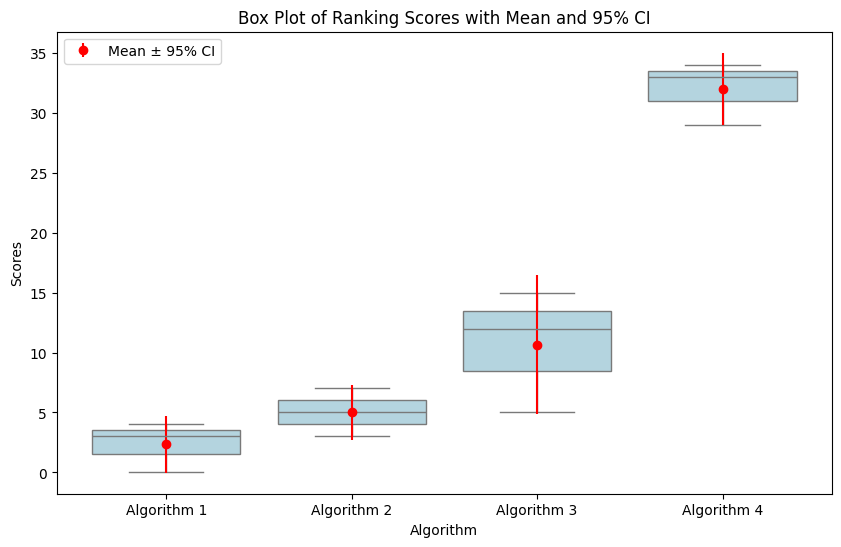

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Sample data matrix
data = np.array([
    [0, 5, 12, 33],
    [3, 3, 15, 29],
    [4, 7, 5, 34]
])

# Convert the numpy array to a pandas DataFrame
df = pd.DataFrame(data, columns=['Algorithm 1', 'Algorithm 2', 'Algorithm 3', 'Algorithm 4'])

# Melt the DataFrame for easier plotting with seaborn
df_melted = df.melt(var_name='Algorithm', value_name='Score')

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Algorithm', y='Score', data=df_melted, color='lightblue')

# Calculate means and 95% confidence intervals
means = df.mean()
sem = df.sem()
ci = 1.96 * sem

# Plot mean and 95% CI using errorbar
color = 'red'  # Use a uniform color for the mean and CI indication
for i, (mean, error) in enumerate(zip(means, ci)):
    if i == 0:  # Only add the label for the first entry
        plt.errorbar(i, mean, yerr=error, fmt='o', color=color, label='Mean ± 95% CI')
    else:
        plt.errorbar(i, mean, yerr=error, fmt='o', color=color)

plt.title('Box Plot of Ranking Scores with Mean and 95% CI')
plt.ylabel('Scores')
plt.xticks(ticks=range(len(means)), labels=df.columns)
# plt.legend(title='Legend')
plt.legend(loc='upper left')
# plt.grid(True)
plt.show()


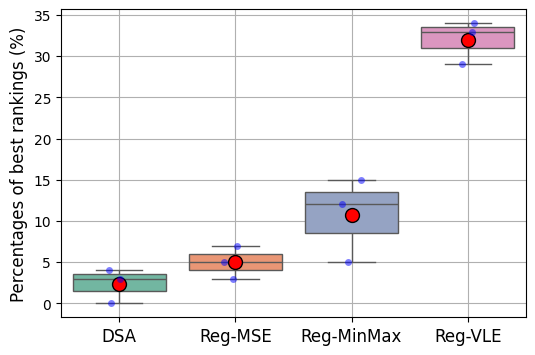

In [31]:
plt.figure(figsize=(6, 4))
box_plot = sns.boxplot(data=data, palette="Set2", showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black", "markersize":"10"})

sns.stripplot(data=data, color='blue', jitter=0.1, size=5, alpha=0.5)

# Set plot titles and labels
plt.xticks(ticks=[0, 1, 2, 3], labels=['DSA', 'Reg-MSE', 'Reg-MinMax', 'Reg-VLE'], fontsize=12)
# plt.title('Algorithm Ranking', fontsize=14)
plt.ylabel('Percentages of best rankings (%)', fontsize=12)
plt.grid(True)

plt.show()